# Final Project 

We will try to predict whether a breast cancer is benign or malignant based on the data of Bi Rads Assessment. 

Brief information about the dataset:

1. Number of Instances: 961
2. Number of Attributes: 6 (1 goal field, 1 non-predictive, 4 predictive attributes)
3. Attribute Information:
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)

4. Missing Attribute Values: Yes
    - BI-RADS assessment:    2
    - Age:                   5
    - Shape:                31
    - Margin:               48
    - Density:              76
    - Severity:              0

5. Class Distribution: benign: 516; malignant: 445

The dataset can be found here http://archive.ics.uci.edu/ml/datasets/mammographic+mass .

We will use Decision Tree, Random Forest, KNN, Naive Bayes, SVM methods to classify the data.

In [154]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [145]:
data = pd.read_csv("C:\\Users\\Rahul Reddy\\Documents\\Udemy - Data Science\\Deep Learning\\mammographic_masses.data.txt")
data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


We can see that the data is missing headers and also some values. So we will provide the headers and mark the missing values as NaN

In [147]:
data = pd.read_csv("C:\\Users\\Rahul Reddy\\Documents\\Udemy - Data Science\\Deep Learning\\mammographic_masses.data.txt",
                   header=None,names = ['BR_Ass','Age','Shape','Margin','Density','Severity'], na_values=["?"])
data.head()

,BR_Ass,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Now we need to clean the data by removing the NaN values. But first we need to check that the blank values do not belong to any specific category. If they do, removing them will reduce the variance and we need try and avoid that. So let us check all missing values.

In [152]:
data.loc[(data['BR_Ass'].isnull())|
         (data['Age'].isnull())|
         (data['Shape'].isnull())|
         (data['Margin'].isnull())|
         (data['Density'].isnull())
        ]

,BR_Ass,Age,Shape,Margin,Density,Severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


The missing values look random. So lets go ahead and remove them. After removing them we can see now that the count of all features is same now.

In [155]:
ndata = data.dropna()
ndata.describe()

,BR_Ass,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Check the corelation in the data

In [156]:
print(ndata.corr())

            BR_Ass       Age     Shape    Margin   Density  Severity
BR_Ass    1.000000  0.094623  0.180120  0.157771  0.028356  0.223826
Age       0.094623  1.000000  0.380096  0.420913  0.052417  0.455216
Shape     0.180120  0.380096  1.000000  0.738014  0.073969  0.564763
Margin    0.157771  0.420913  0.738014  1.000000  0.124860  0.574498
Density   0.028356  0.052417  0.073969  0.124860  1.000000  0.068651
Severity  0.223826  0.455216  0.564763  0.574498  0.068651  1.000000


Now lets remove the non-predictive column BR_Ass as it was only given for information.
Let us also remove the Shape column which has a very high corelation with Margin but lesser standard deviation and lesser corelation with Severity when compared to Margin.

In [157]:
features = list(data.columns[:5])
features1 = list(['Age','Margin','Density'])
X = ndata[features1]
Y = ndata['Severity']

In [158]:
scaler = StandardScaler()
print(scaler.fit(X))
normdata = scaler.transform(X)
print(normdata)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.7650629   1.39618483  0.24046607]
 [ 0.15127063  1.39618483  0.24046607]
 [-1.89470363 -1.157718    0.24046607]
 ..., 
 [ 0.56046548  1.39618483  0.24046607]
 [ 0.69686376  1.39618483  0.24046607]
 [ 0.42406719  0.11923341  0.24046607]]


In [159]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [160]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

Display the decision tree now

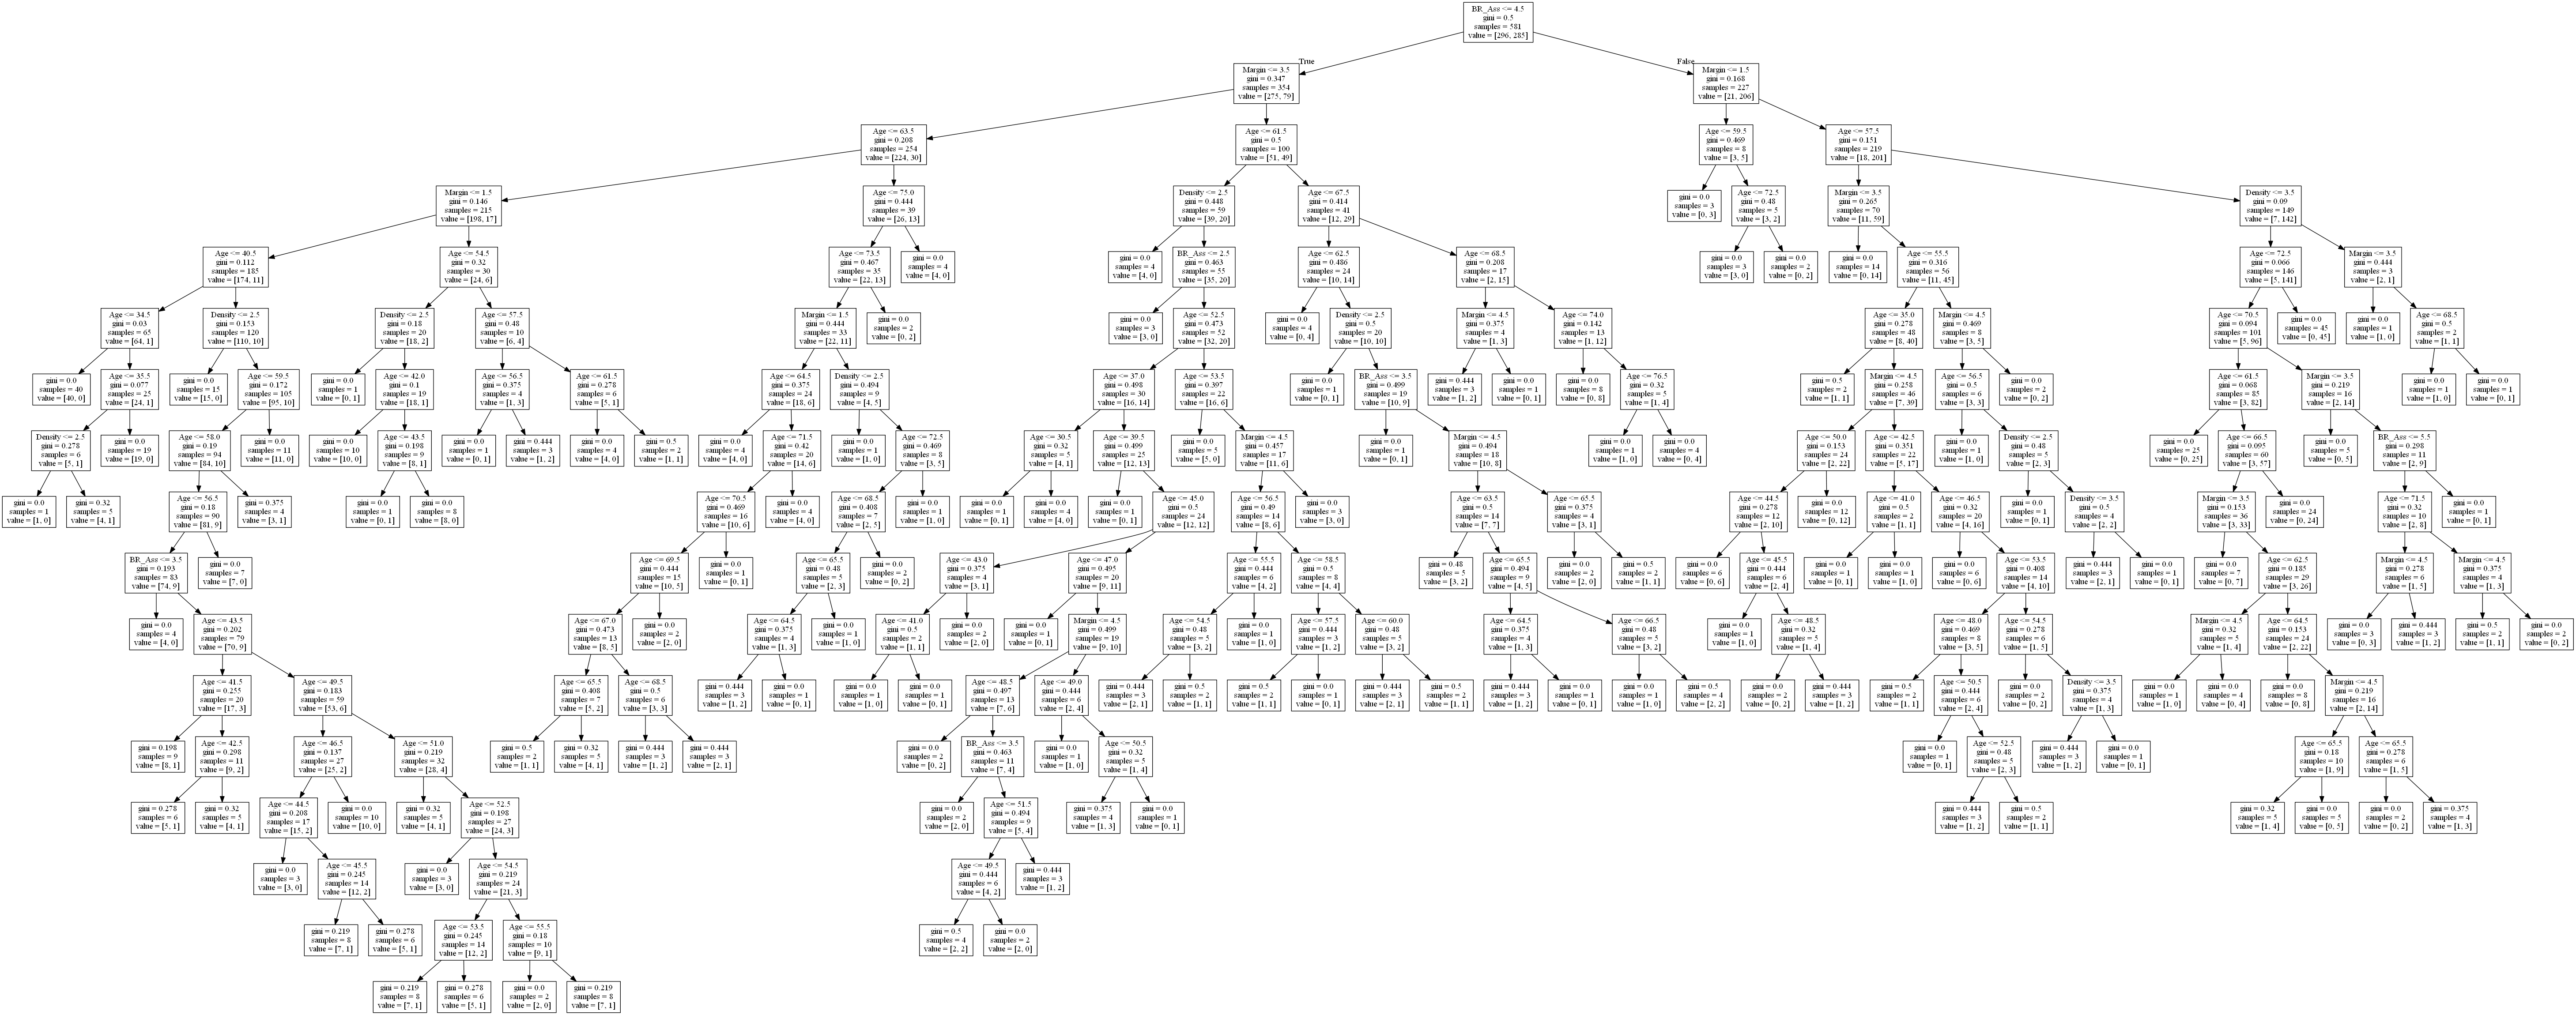

In [87]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features1)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [161]:
clf.score(X_test,y_test)

0.74297188755020083

In [162]:
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
print(scores.mean())

[ 0.74251497  0.73652695  0.72891566  0.7030303   0.73333333]
0.728864243036


We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles

In [163]:
from sklearn.ensemble import RandomForestClassifier

clfRF = RandomForestClassifier(n_estimators=10)
clfRF = clf.fit(X_train, y_train)

clfRF.score(X_test,y_test)

0.73895582329317266

In [164]:
scoresRF = cross_val_score(clfRF, X, Y, cv=5)
print(scoresRF)
print(scoresRF.mean())

[ 0.74251497  0.73652695  0.74698795  0.7030303   0.73333333]
0.732478700868


NAIVE BAYES

In [165]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

scalerNB = preprocessing.MinMaxScaler()
newX = scaler.fit_transform(X)

clfNB = MultinomialNB()
clfNB.fit(X_train, y_train)

clfNB.score(X_test,y_test)

0.74297188755020083

In [166]:
scoresNB = cross_val_score(clfNB, X, Y, cv=5)
print(scoresNB)
print(scoresNB.mean())

[ 0.7245509   0.76047904  0.76506024  0.68484848  0.75757576]
0.738502884702


KNN

In [167]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train) 

neigh.score(X_test,y_test)

0.73895582329317266

In [177]:
neighbour = KNeighborsClassifier(n_neighbors=10)
scoresKNN = cross_val_score(neighbour, X, Y, cv=5)
print(scoresKNN)
print(scoresKNN.mean())

[ 0.71856287  0.78443114  0.78915663  0.73333333  0.75151515]
0.755399824666


SVM

In [173]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

svc.score(X_test,y_test)

0.75903614457831325

In [175]:
svcLin = svm.SVC(kernel='linear', C=C)
scoresSVC = cross_val_score(svc, X, Y, cv=5)
print(scoresSVC)
print(scoresSVC.mean())

[ 0.74850299  0.77245509  0.77710843  0.77575758  0.76363636]
0.767492091392


Now lets try with other kernels

In [174]:
svcRBF = svm.SVC(kernel='rbf', C=C)
scoresRBF = cross_val_score(svcRBF, X, Y, cv=5)
scoresRBF.mean()

0.77104848353676003